In [79]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [80]:
# Load the data from the FRAFirm.csv into a pandas dataframe

data = pd.read_csv('FRAFirm.csv')

In [81]:
# Exploring the data
print(data.head())
print(data.info())
print(data.describe())

   FIRM  class  Start   End  Length  Night  Gap  WS  idx  Base  ...  Trans  \
0   -10      0    290   610     320      0  999   0    6   5.0  ...   -4.0   
1   -10      0    905  1265     360      0  295   0    6   5.0  ...   -4.0   
2     5      0   1040  1505     465      0  999   1    1   5.0  ...    0.0   
3     4      0    920  1295     375      0  855   0    2   5.0  ...    0.0   
4     1      0   1280  1775     495      1  999   1    1   2.0  ...   -1.0   

   Press  p1s  p1l  p2s  p2l  MalAdj  NFZ  AFZ  MFZ  
0  -4.67    0    0    0    0       0    0    0    0  
1  -4.67  -10  320    0    0       0    0    0    0  
2   0.00  -10  360  -10  320       0    0    0    0  
3  -0.67    5  465  -10  360       0    0    0    0  
4   0.00    4  375    5  465       0    0    0    0  

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38759 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----

In [82]:
# split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(
    data.drop(['class'], axis=1), 
    data['class'], 
    test_size=0.3, 
    random_state=42
)

test_data.columns = ['feat_'+str(i) for i in range(len(test_data.columns))]

In [83]:
# exploratory data analysis
# sample_data = data.sample(n=1000, random_state=42)
# sns.pairplot(data)
# plt.show()
# print(data['class'].unique())



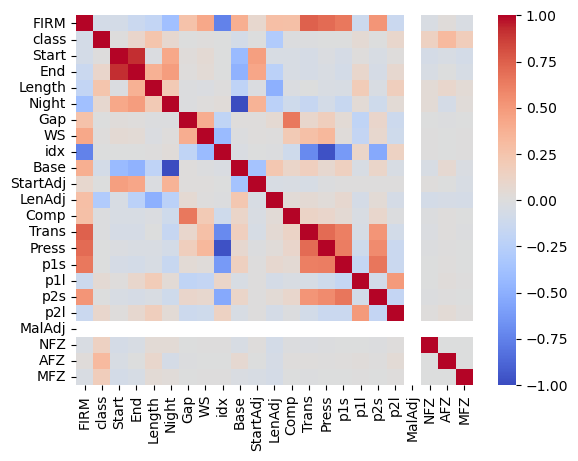

In [84]:
# generate correlation matrix
corr = data.corr()

# visualize correlation matrix with heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.show()


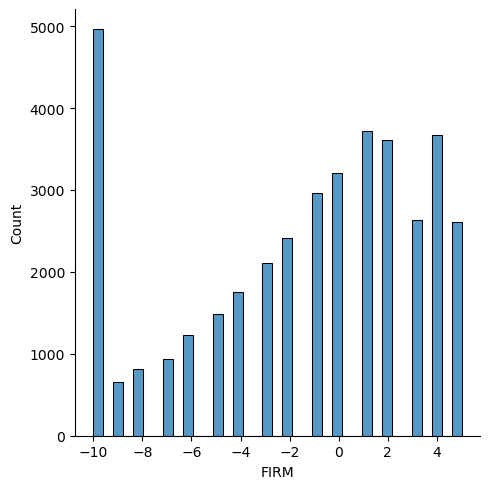

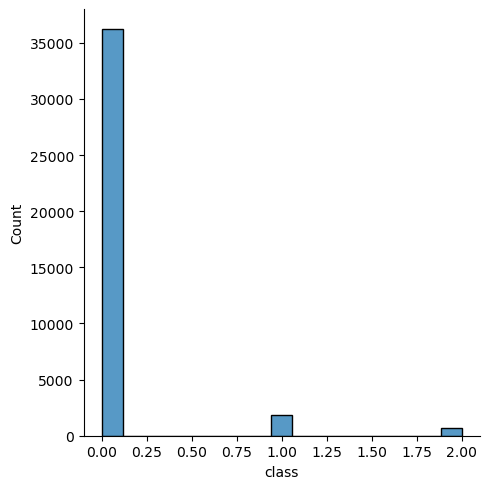

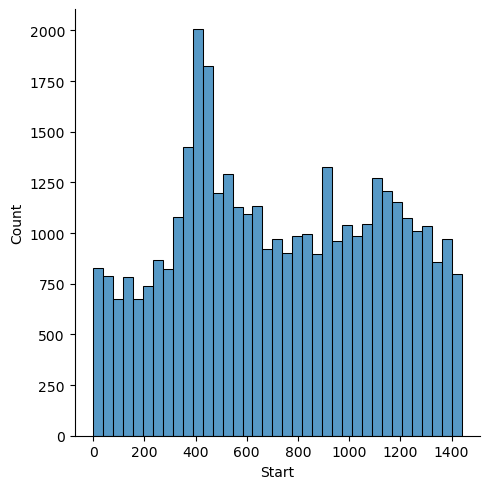

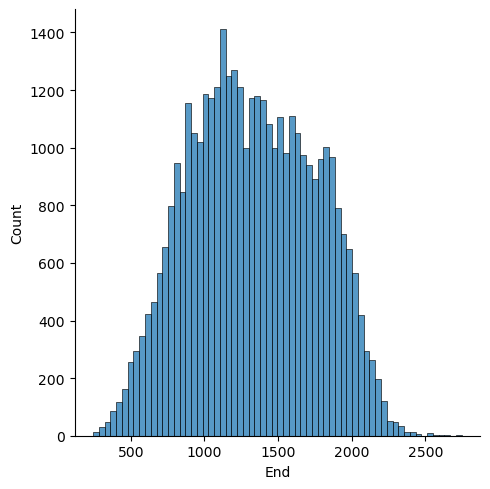

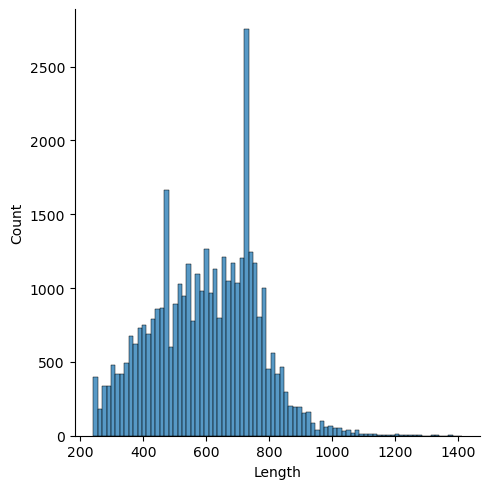

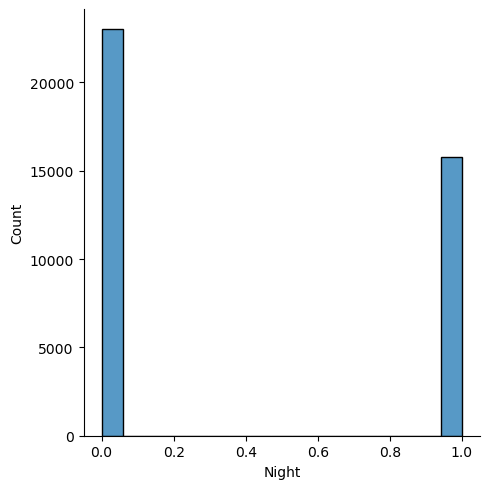

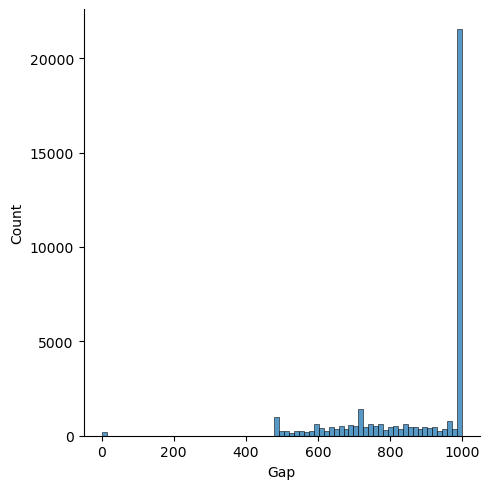

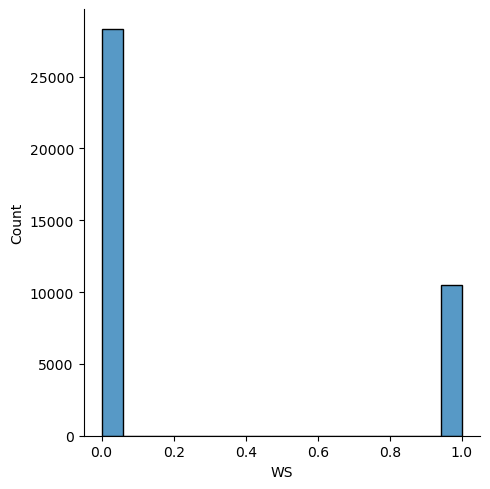

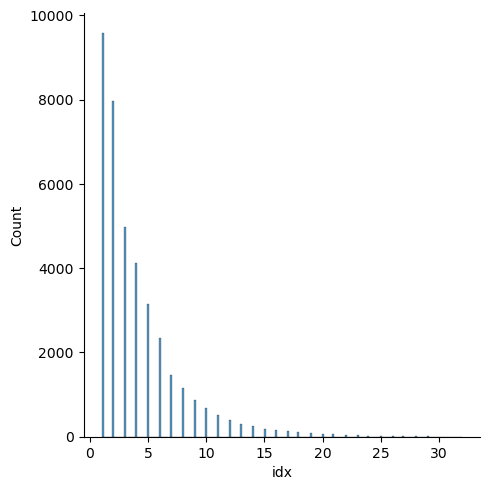

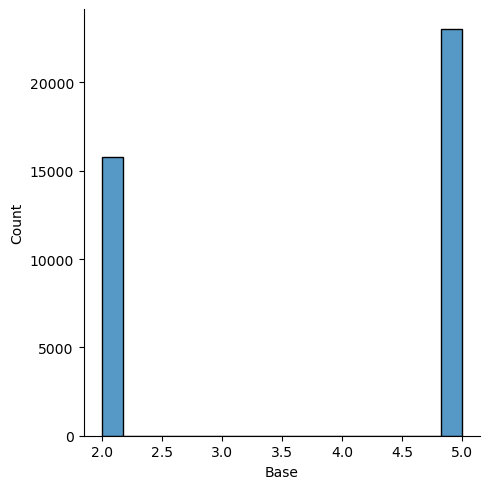

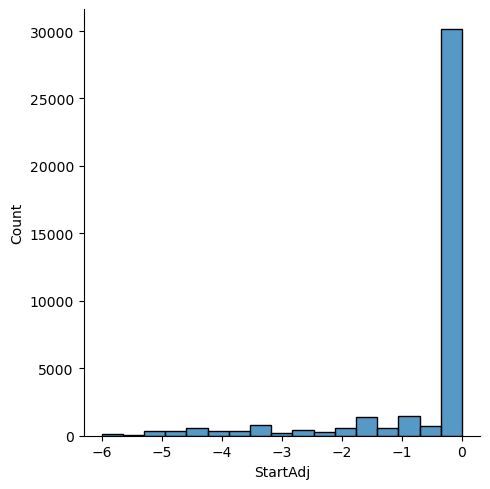

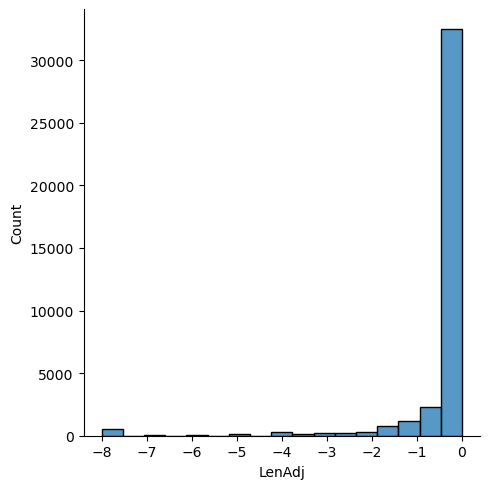

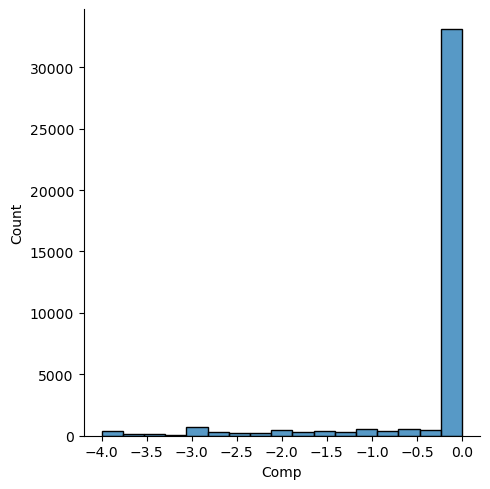

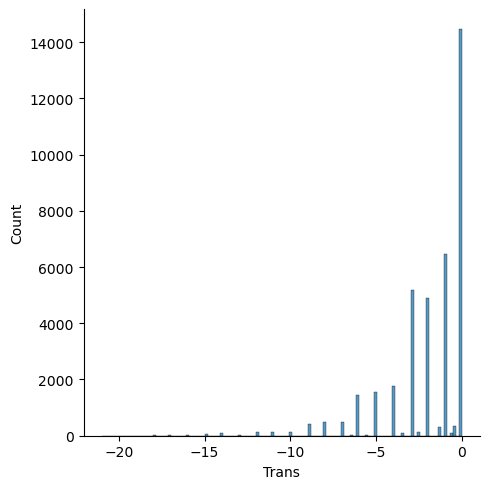

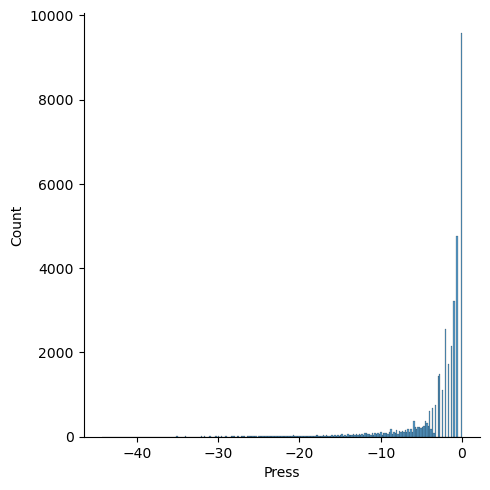

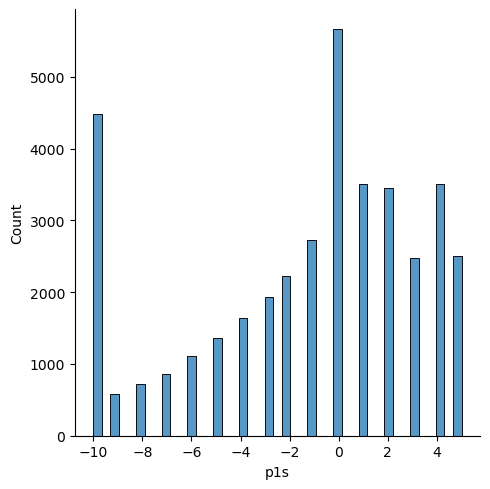

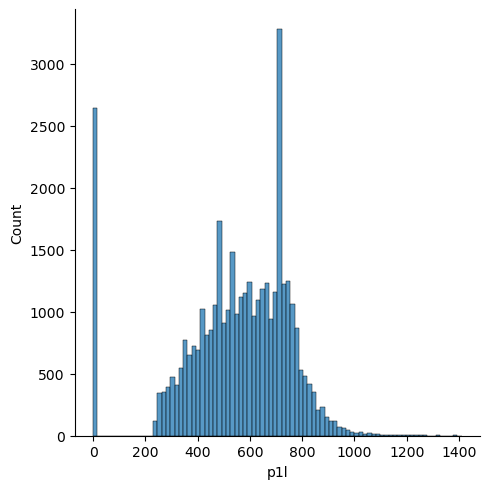

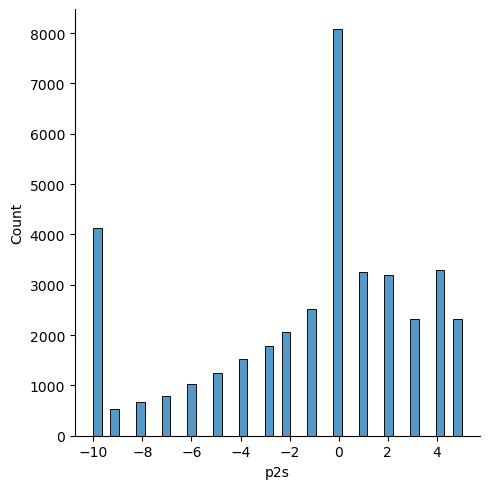

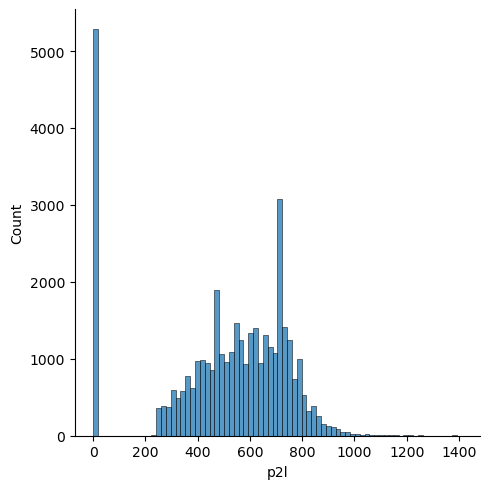

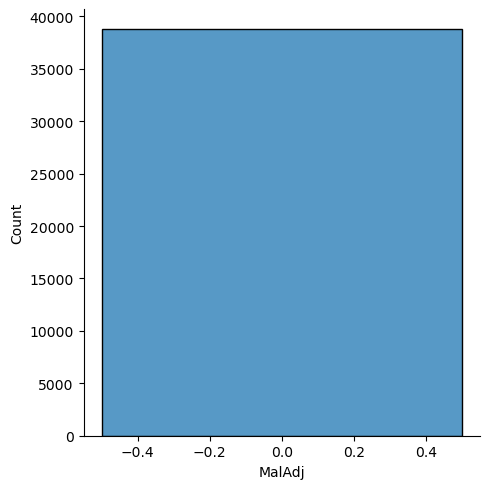

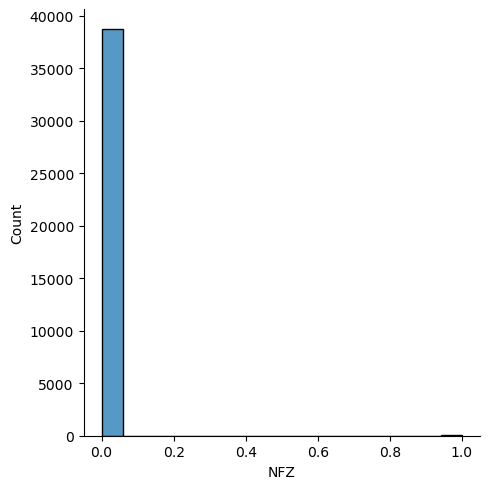

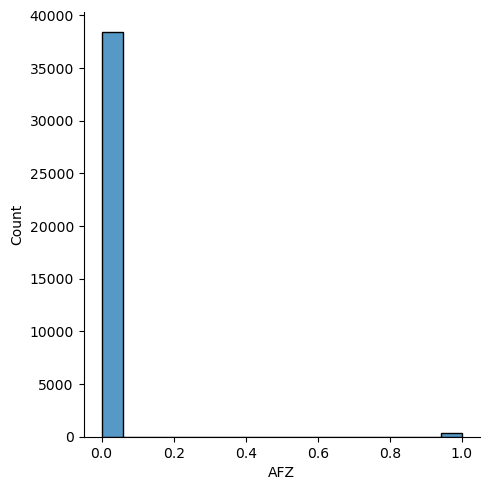

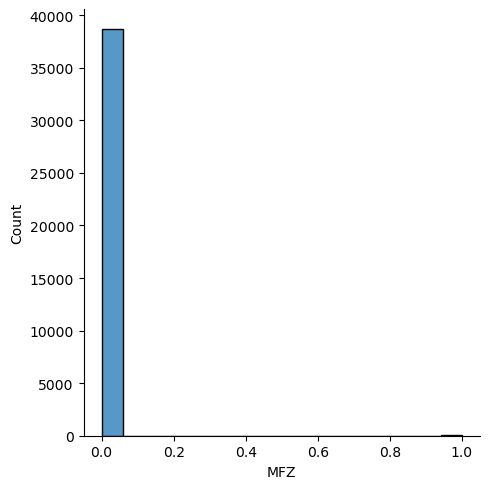

In [85]:
# generate individual distribution plots for each variable
for col in data.columns:
    sns.displot(data[col], kde=False)
    plt.show()


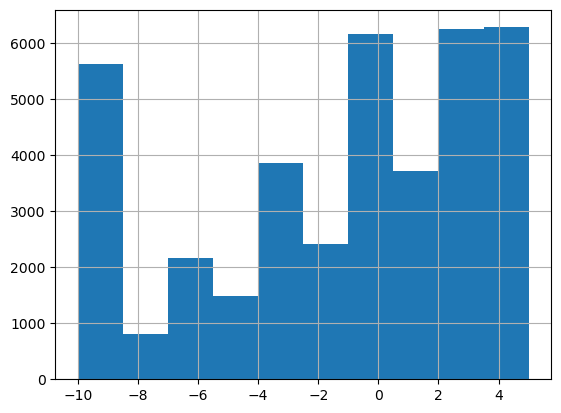

In [86]:
# histogram for the first column of the dataset
data.iloc[:,0].hist()
plt.show()

In [87]:
# add feature names to the test data
test_data.columns = ['feat_'+str(i) for i in range(len(test_data.columns))]
test_data['FIRM'] = 0  # add a dummy column for 'FIRM'

In [88]:
# fit the logistic regression model to the training data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

lr_model = LogisticRegression(max_iter=1000, solver='saga')
lr_model.fit(train_data_scaled, train_target)


LogisticRegression(max_iter=1000, solver='saga')

In [90]:
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)


Train data columns: Index(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21'],
      dtype='object')
Test data columns: Index(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22'],
      dtype='object')


In [93]:
# Remove the extra column from the test dataset
test_data = test_data.drop('feat_22', axis=1)

In [94]:
# Re-evaluate the model
predictions = lr_model.predict(test_data)
accuracy = accuracy_score(test_target, predictions)
precision = precision_score(test_target, predictions, average='weighted', zero_division=0)
recall = recall_score(test_target, predictions, average='weighted')
f1 = f1_score(test_target, predictions, average='weighted')
confusion = confusion_matrix(test_target, predictions)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:\n", confusion)

Accuracy: 0.05
Precision: 0.00
Recall: 0.05
F1 Score: 0.00
Confusion Matrix:
 [[    0 10722   127]
 [    0   570     0]
 [    0   208     1]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [95]:
# interpret the results of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

ValueError: All arrays must be of the same length

In [ ]:
# repeat steps 6-9 after removing the 'FIRM' column
train_data, test_data, train_target, test_target = train_test_split(
    data.drop(['class', 'FIRM'], axis=1), 
    data['class'], 
    test_size=0.3, 
    random_state=42
)
lr_model = LogisticRegression()
lr_model.fit(train_data[features], train_target)
predictions = lr_model.predict(test_data[features])
accuracy = accuracy_score(test_target, predictions)
precision = precision_score(test_target, predictions, average='weighted')
recall = recall_score(test_target, predictions, average='weighted')
f1 = f1_score(test_target, predictions, average='weighted')
confusion = confusion_matrix(test_target, predictions)
print("Accuracy after removing 'FIRM' column: {:.2f}".format(accuracy))
print("Precision after removing 'FIRM' column: {:.2f}".format(precision))
print("Recall after removing 'FIRM' column: {:.2f}".format(recall))
print("F1 Score after removing 'FIRM' column: {:.2f}".format(f1))
print("Confusion Matrix after removing 'FIRM' column:\n", confusion)